In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import MDAnalysis
from MDAnalysis.analysis import rms, align
import matplotlib.ticker as ticker

# RMSF

In [3]:
def get_rmsf(u):
    average = align.AverageStructure(u, u, select='protein and name CA',
                                 ref_frame=0).run()
    ref = average.results.universe

    aligner = align.AlignTraj(u, ref,
                              select='protein and name CA',
                              in_memory=True).run()

    ALL = u.select_atoms('protein and name CA')
    R = rms.RMSF(ALL).run(start=1000)

    return ALL.resids, R.results.rmsf

In [4]:
u_1 = MDAnalysis.Universe('../2_2dri-RIP_MD/2_2dri-RIP_nowat.gro', '../2_2dri-RIP_MD/2_2dri-RIP_nowat.xtc')

In [5]:
resids_1, rmsf_1 = get_rmsf(u_1)

In [6]:
u_2 = MDAnalysis.Universe('../../MD-CL-7-1/1_apo_1urp_nowat.gro', '../../MD-CL-7-1/1_apo_1urp_nowat.xtc')

In [7]:
resids_2, rmsf_2 = get_rmsf(u_2)

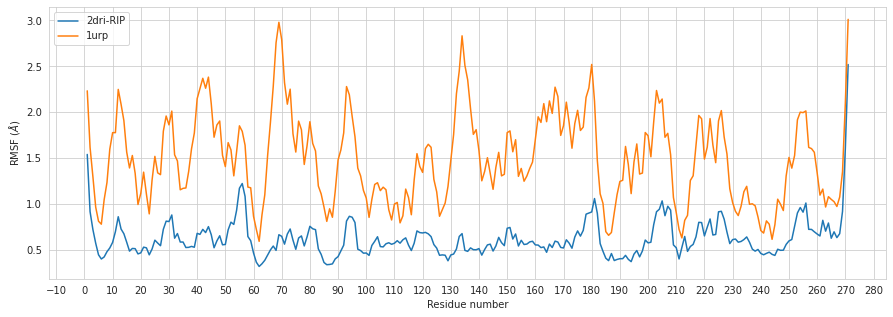

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(resids_1, rmsf_1, label='2dri-RIP')
ax.plot(resids_2, rmsf_2, label='1urp')
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.tick_params(axis='x', labelrotation=0)
plt.xlabel('Residue number')
plt.ylabel('RMSF ($\AA$)')
plt.legend()